In [167]:
#INTRODUCTION: 
'''
In this project, we will delve into an intriguing dataset that encompasses key aspects of data science job postings. 
The dataset offers a multitude of information - from the company and job title,
to the location, job type, experience level, and salary, among other elements.


This project forms a part of my data science portfolio, crafted with the intention to showcase my data manipulation, analysis, and visualization skills. 
My aim with this project is not just to unearth insightful trends about data science jobs,
but also to demonstrate fundamental data science techniques – from preprocessing raw data to extracting meaningful insights.

'''

"\nIn this project, we will delve into an intriguing dataset that encompasses key aspects of data science job postings. \nThe dataset offers a multitude of information - from the company and job title, to the location, job type, experience level, and salary, among other elements.\n\nThe motivation behind this project is to unearth valuable insights into the current data science job market \nthat could potentially guide job seekers, recruiters, and companies alike.\nThese insights could reveal pivotal trends such as the most in-demand skills, \nsalary expectations across various geographies, and the types of companies hiring the most data scientists.\n\nTo accomplish this, we will initially carry out data preprocessing, \nwhich involves cleaning and preparing our data for analysis.\nFollowing this, we will conduct exploratory data analysis to scrutinize the underlying patterns and trends present in our data. \n\nStay tuned to uncover some intriguing insights from the ever-evolving world

In [168]:
import numpy as np
import matplotlib_inline 
import matplotlib.pyplot as plt
import pandas as pd
import os 
import math
import pathlib
from pathlib import Path
!pip install geonamescache

In [169]:
#This code is used to easily read in the data path of the original .csv file 
data_path = Path(r"C:\Users\Matt\Desktop\Data_Science_Job_Project\data_science_job.csv")
df = pd.read_csv(data_path, encoding='latin1')

In [170]:
#Displaying the raw data set
df

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities
0,SGS,Clinical Data Analyst,"Richardson, TX, United States",Full Time,Entry-level,48K+ *,"Computer Science,Data quality,Genetics,Mathema...",",,,,"
1,Ocorian,AML/CFT & Data Analyst,"Ebène, Mauritius",Full Time,Entry-level,48K+ *,"Agile,Data management,Finance,Security,,",",,,,"
2,Cricut,Machine Learning Engineer,"South Jordan, UT, United States",Full Time,NaN,90K+ *,"Agile,Architecture,AWS,Computer Science,Comput...","Career development,,,,"
3,Bosch Group,Application Developer & Data Analyst,"Nonantola, Italy",Full Time,Entry-level,48K+ *,"Engineering,Industrial,Oracle,Power BI,R,R&D",",,,,"
4,Publicis Groupe,Data Engineer Full time (Public Sector) USA,"Arlington, VA, United States",Full Time,Mid-level,108K+,"AWS,Azure,Computer Science,Consulting,Dataflow...","Flex hours,Flex vacation,Parental leave,Unlimi..."
...,...,...,...,...,...,...,...,...
3193,Western Digital,Data Scientist - New College Graduate,"Biñan, Philippines",Full Time,Entry-level,39K+ *,"APIs,Clustering,Computer Science,Data visualiz...","Career development,,,,"
3194,Experian,Cloud Data Analyst,"Heredia, Costa Rica",Full Time,Senior-level,92K+ *,"AWS,Big Data,Computer Science,GCP,Snowflake,SQL","Equity,Medical leave,Salary bonus,,"
3195,Locus Robotics,"Robotics Engineer, Sensors","Wilmington, MA, United States",Full Time,Senior-level,62K+ *,"E-commerce,Engineering,Linux,Python,Robotics,S...",",,,,"
3196,ATB Financial,Data Scientist,"Edmonton, Alberta, Canada",Full Time,Entry-level,39K+ *,"Computer Science,Data Analytics,Data Mining,Ec...","Career development,Startup environment,,,"


In [171]:
#DATA CLEANING 
#First, we will clean up the data set in various way for processing and analysis 

In [172]:
#DATA CLEANING: 'Salary'
#We want to convert all salaries into a numerical value for comparison 
#For simplicity, we will assume unless otherwise specified, that the data provided is in USD

#First, we remove all NaN salaries from the table: 
df = df.dropna(subset=['Salary'])
df.sort_values("Salary", inplace = True)

#Printing the unique values to understand the data better
#print(df['Salary'].unique())
#Note that salaries are defined with + (ex: 50k+). 
#For simplicity, we will round to the nearest thousand. So 50k -> 50000

#Note are GBP and EURO values. We will convert these to USD
#Note the exchange rates as of 7/3/23
#1 EUR = 1.09 USD 
#1 GBP = 1.27 USD

#For processing, we set each value of the 'Salary' column to a string
df['Salary'] = df['Salary'].astype(str)

#We now process our data into a new column called 'Salary_USD'
#We will utilize regex expressions for processing
import re

#Defining  function to process the 'Salary' column:
def parse_salary(salary):
    salary = salary.strip()
    salary_split = salary.split(' ')
    #we will create a modifier value and multiply it to our result to get USD value
    modifier = 1
    for item in salary_split:
        if re.match(r'^\d', item):
            numeric_value = re.findall(r'\d+', item)
            if numeric_value:
                numeric_value = int(numeric_value[0])
                usd_salary = numeric_value*modifier*1000
                return usd_salary
        if 'GBP'in item:
            modifier = 1.27
        if 'EUR' in item: 
            modifier = 1.09

df['Salary_USD']= df['Salary'].apply(parse_salary)

C:\Users\Matt\AppData\Local\Temp\ipykernel_19976\3210654877.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values("Salary", inplace = True)
C:\Users\Matt\AppData\Local\Temp\ipykernel_19976\3210654877.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary'] = df['Salary'].astype(str)
C:\Users\Matt\AppData\Local\Temp\ipykernel_19976\3210654877.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

In [173]:
df

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities,Salary_USD
2627,OPPO Research Center,Senior Research Scientist/Engineer -Video Unde...,"Palo Alto, California, United States",Full Time,Mid-level,100K+,"Caffe,Computer Science,Computer Vision,Deep Le...","Career development,Conferences,,,",100000.0
113,Freeform,Software Engineer (Data Pipeline),"Los Angeles, CA",Full Time,Senior-level,100K+,"Big Data,CI/CD,Computer Science,Computer Visio...","Career development,Equity,Flex hours,Flex vaca...",100000.0
203,Vericast,Product Manager- Data Visualization & Analytics,"Austin, TX, United States",Full Time,NaN,100K+,"Business Intelligence,Data visualization,Excel...","Career development,Flex hours,Flex vacation,He...",100000.0
478,Memora Health,"Analyst, Reporting and Business Intelligence",Remote- U.S. Based,Full Time,Senior-level,100K+,"Business Intelligence,Engineering,Looker,Mongo...","Career development,Competitive pay,Equity,Flex...",100000.0
2229,Zynga,Senior Gameplay AI Engineer - Star Wars,Canada,Full Time,Senior-level,100K+,"Architecture,Engineering,Pipelines,,,","401(k) matching,Career development,Competitive...",100000.0
...,...,...,...,...,...,...,...,...,...
2716,Monzo,"Data Analyst, Borrowing",London,Full Time,Senior-level,GBP 55K,"AWS,Banking,BigQuery,Data quality,Data warehou...","Career development,Conferences,Equity,Flex hou...",69850.0
2492,Our Future Health,Data Manager - Airlock (18 month FTC),"London, England, United Kingdom",Full Time,Mid-level,GBP 55K+,"Consulting,Genetics,ISO 27001,Privacy,R,Research","Career development,Flex hours,Health care,Medi...",69850.0
1384,iwoca,Senior Data Scientist - UK Ops,"London, England, United Kingdom",Full Time,Mid-level,GBP 60K+,"Bayesian,Engineering,Machine Learning,Matlab,N...","Career development,Fitness / gym,Flex hours,Fl...",76200.0
2536,Frazer-Nash Consultancy,Senior Data Architect,"Burton upon Trent, England, United Kingdom",Full Time,Mid-level,GBP 65K+,"Architecture,Data governance,Data quality,Data...","Competitive pay,Flex hours,Salary bonus,Startu...",82550.0


In [174]:
#DATA CLEANING: 'Location'


#I would like to investigate how the data is related to location 
#To do this, I need to clean up the data set's 'Location' column. 
#Ideally, I would like a single country of origin for each entry. For example: Florida, USA -> United States
#The new locational data will be stored in a seperate column called 'Country'
# We will map any entry containing the word 'remote' to Remote

#We will start by removing all NAN values present in the "Location" column 
df= df.dropna(axis = 'index', how = 'any', subset = ['Location'])

#We will then standardize all the locations to a format for processing: 
#This is achieved by making all characters lowercase and removing any whitespace
df['Location'] = df['Location'].str.lower().str.strip()

#We now must go through the data set and standardize all the entries 
#We will map each entry to a country name
#First, we will store each unique item in the 'Location' data set to an array called: locations
locations = df['Location'].unique()

#to easily map our locations, we will utilize the GeonamesCache library
#this is a free repository of locational data that we can use to help clean our data set

#we start by importing the library: 
from geonamescache import GeonamesCache

#We then create a function to handle each location
gc = GeonamesCache()
def parse_location(location):
    
    #If the location has remote, we set the location to "Remote"
    if 'remote' in location:
        return 'Remote'
    
   #This section handles non-remote locations 
    else:
        #splitting the location into an array of strings by using the comma as a delimmeter
        location_list = location.split(',')
        location_list.sort()
        for loc in location_list:
            loc  = loc.strip()
            loc = loc.title()
            #detects if country is in list -> sets value to country 
            if gc.get_countries_by_names().get(loc):
                return gc.get_countries_by_names().get(loc)['name']
            
            #detects if US state is in list -> sets value to 'United States'
            if gc.get_us_states_by_names().get(loc):
                return 'United States'
            
            #detects if US state is in list by state abbreviation -> sets to 'United States'
            states = gc.get_us_states()
            if loc.upper() in states:
                return 'United States'
            
            #detects if city is in list-> sets value to country of origin
            if gc.get_cities_by_name(loc): 
                city = gc.get_cities_by_name(loc)
                unknown_key = list(city[0].keys())[0]
                country_code = city[0][unknown_key]['countrycode']  # Access 'countrycode' using the unknown key
                c = gc.get_countries().get(country_code)
                return c['name']
            
#Applying the function to our 'Location' column and printing the results
df['Country'] = df['Location'].apply(parse_location)

#We now have a unique location for each individual row:

In [175]:
#DATA ANALYSIS 
#We now begin to analyze the data set in various different ways

Text(0.5, 1.0, 'Number of Listings per Company')

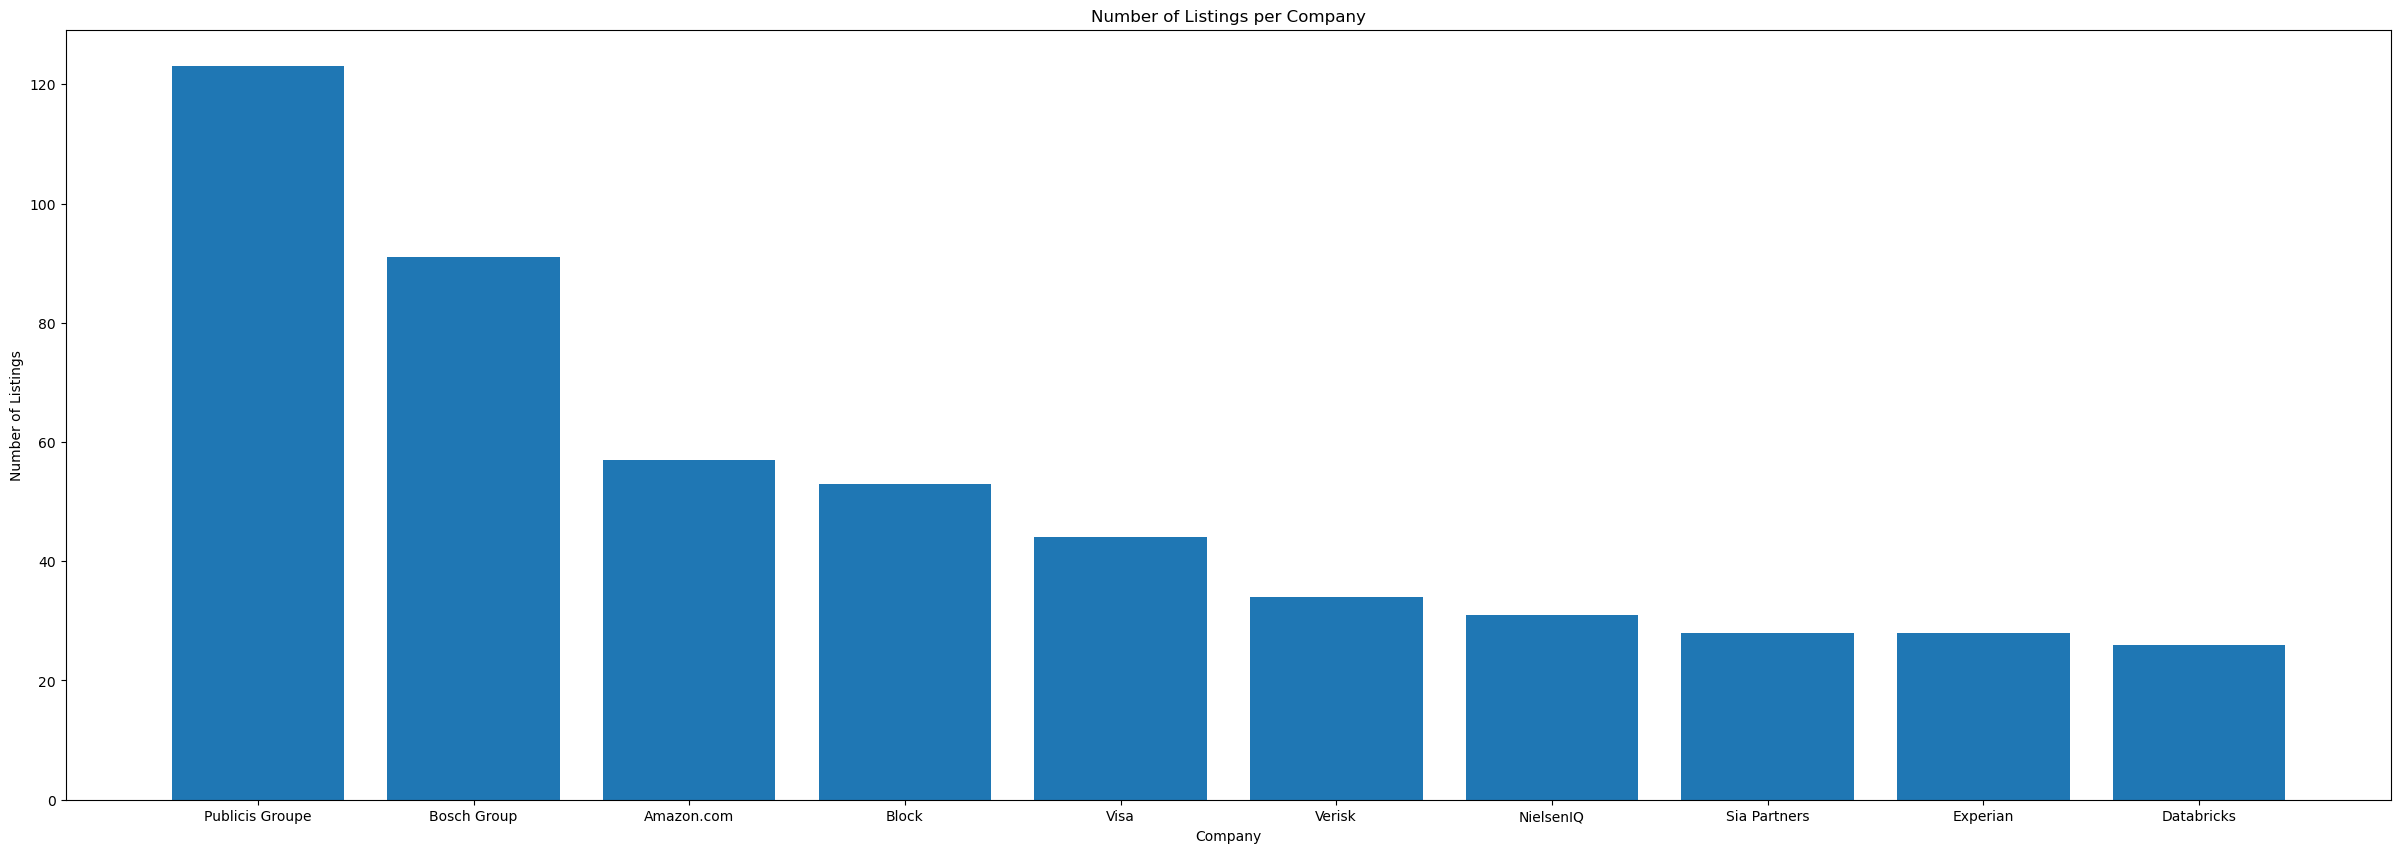

In [176]:
#creating a bar chart of companies vs listing for top 10 most frequent companies
company_counts_series = df['Company'].value_counts()[:10]
companies = company_counts_series.index
counts = company_counts_series.values

plt.figure(figsize=(30, 10))
plt.bar(companies,counts)
plt.xlabel('Company')
plt.ylabel('Number of Listings')
plt.title('Number of Listings per Company')

Text(0.5, 1.0, 'Number of Listings per Job Title')

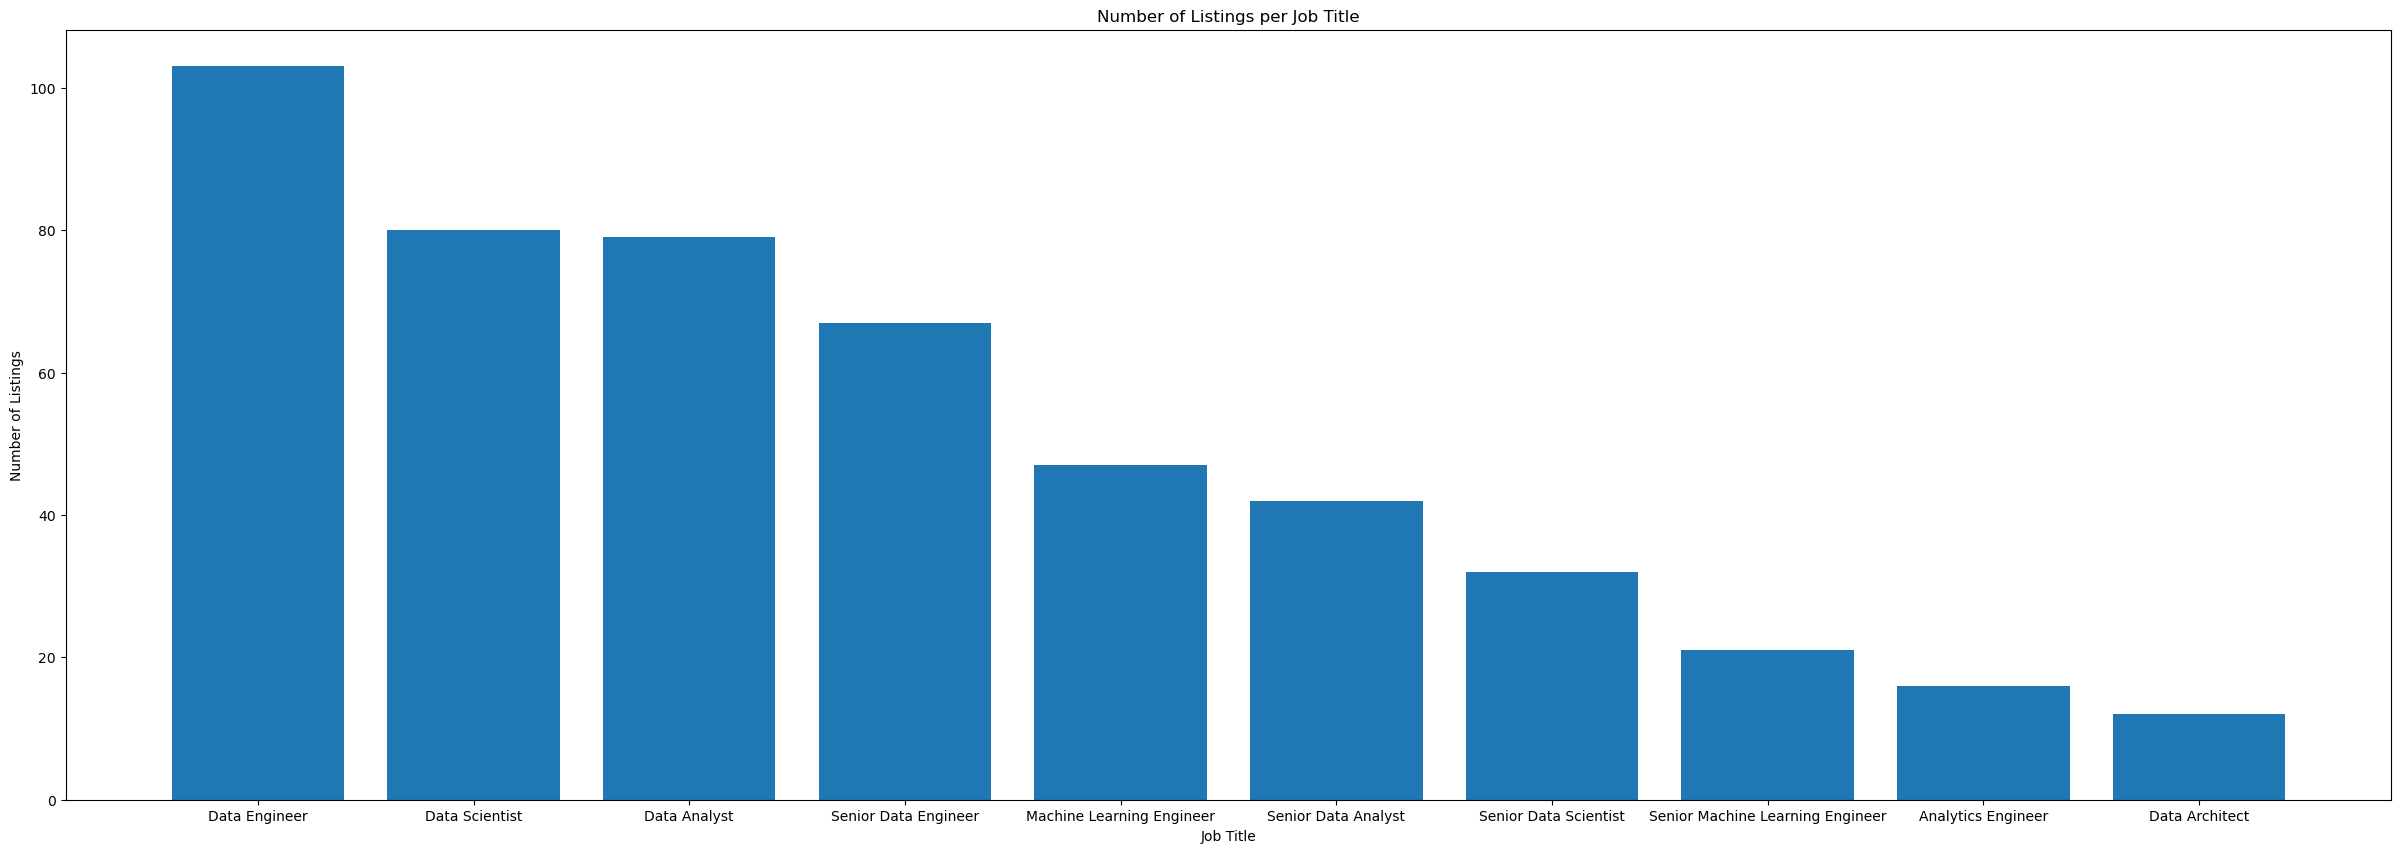

In [177]:
#creating a bar chart of top 10 most frequent job titles
job_counts_series = df['Job Title'].value_counts()[:10]
jobs= job_counts_series.index
job_counts = job_counts_series.values

plt.figure(figsize=(30, 10))
plt.bar(jobs,job_counts)
plt.xlabel('Job Title')
plt.ylabel('Number of Listings')
plt.title('Number of Listings per Job Title')

In [178]:
#We can see that 'Data Engineer', 'Data Scientist', and 'Data Analyst' positions are most in demand.

C:\Users\Matt\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 150 (\x96) missing from current font.
  func(*args, **kwargs)


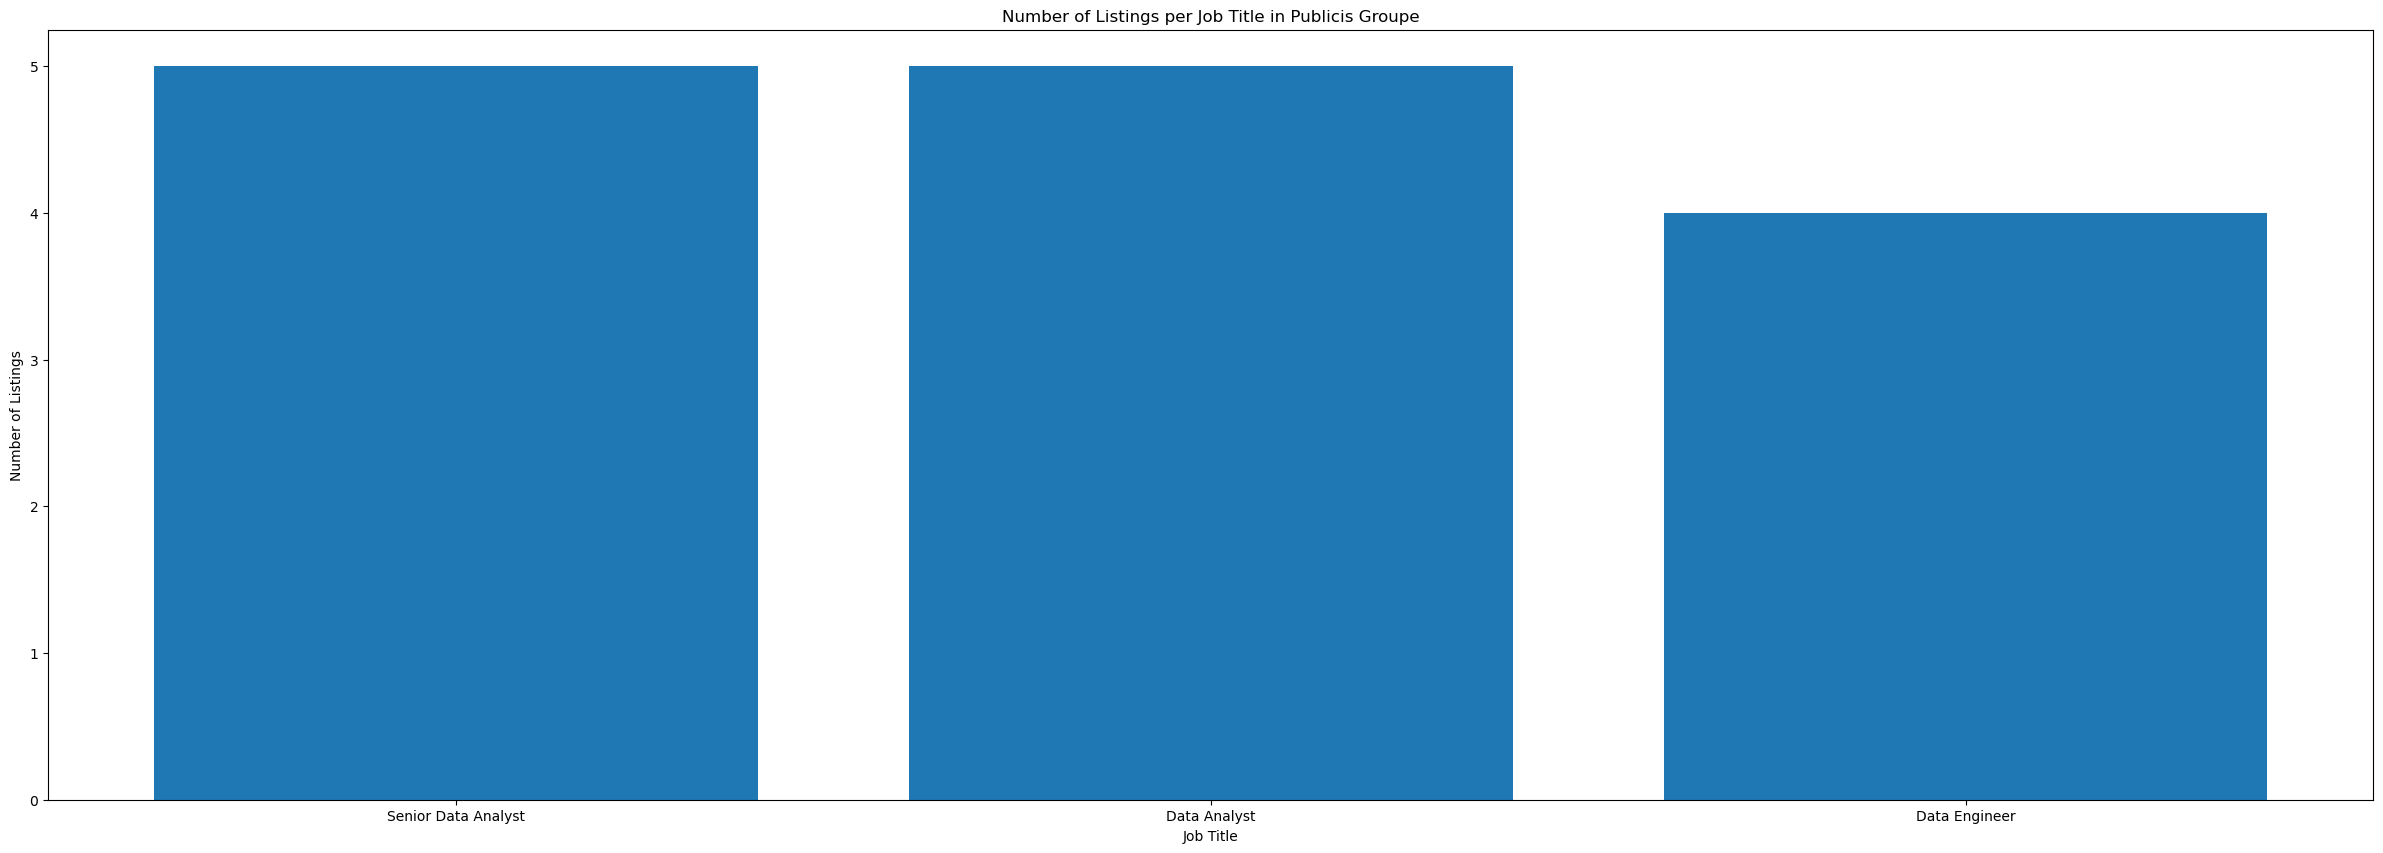

C:\Users\Matt\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


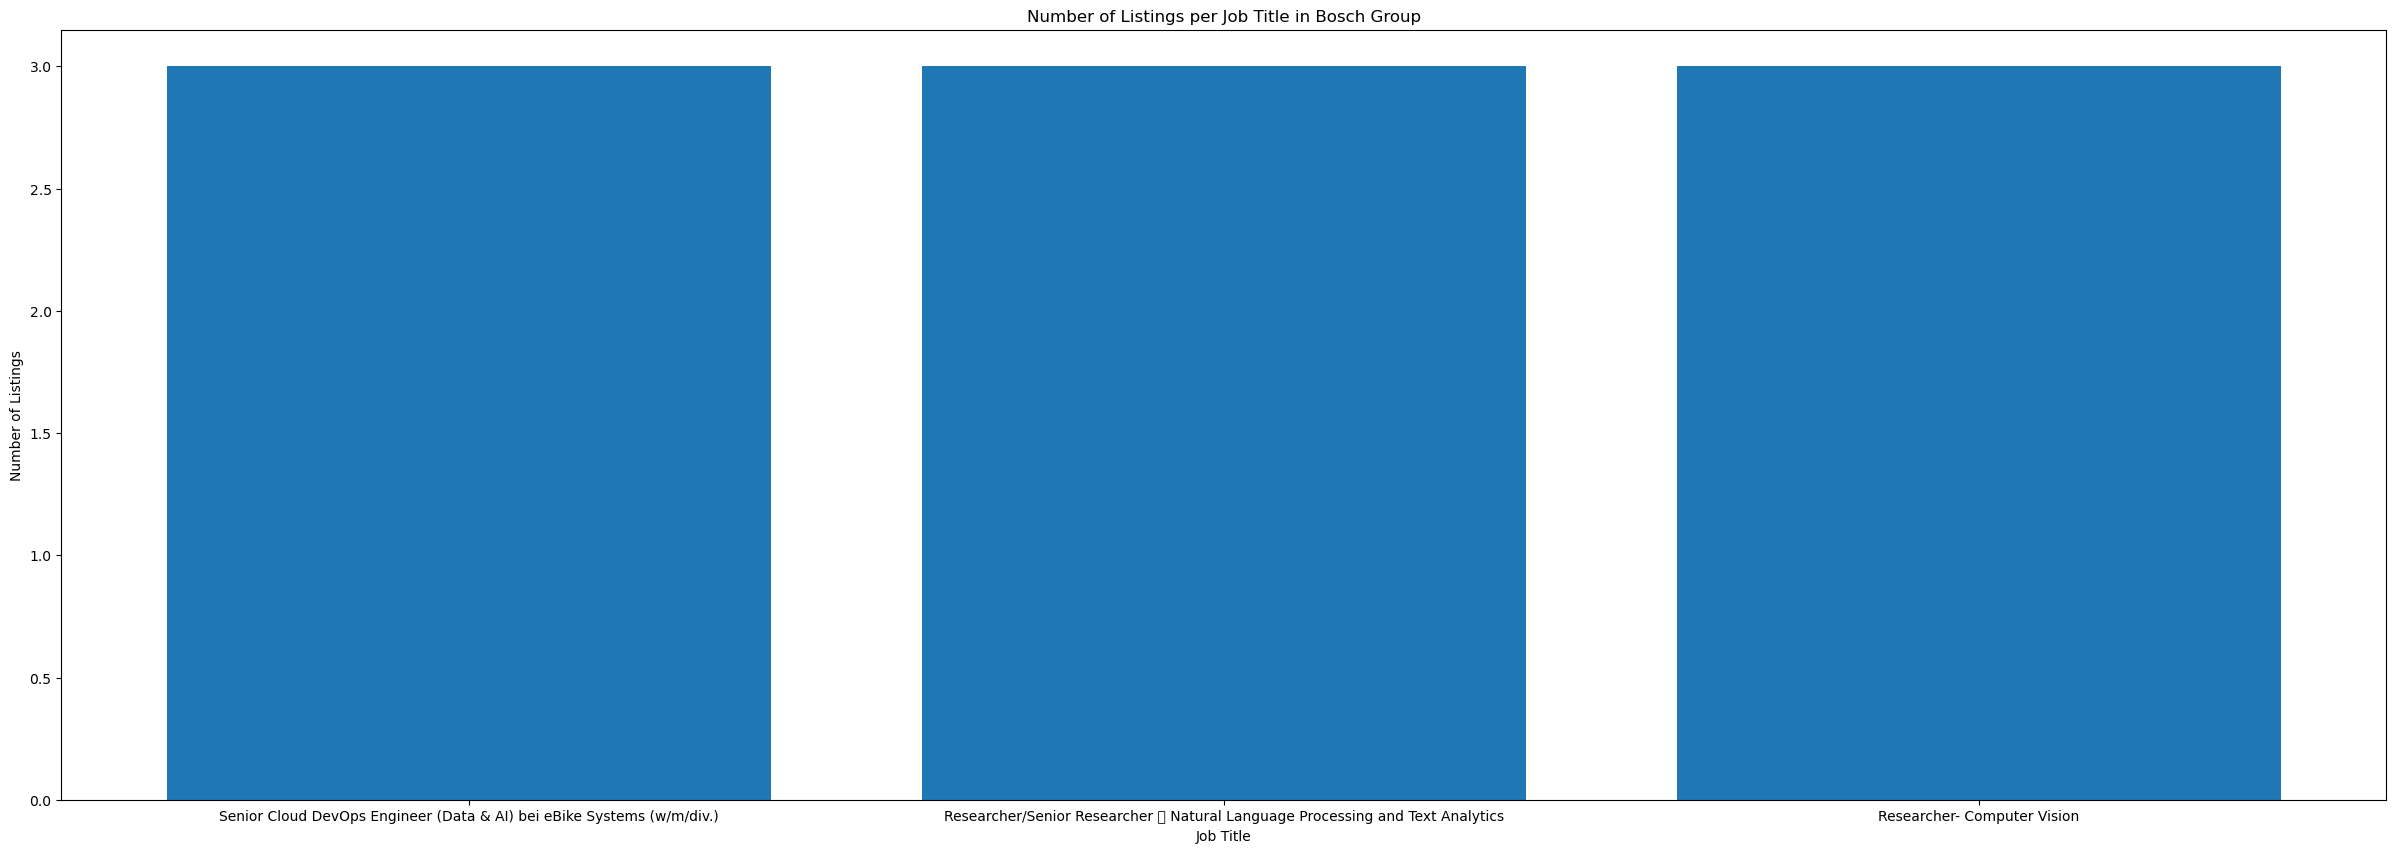

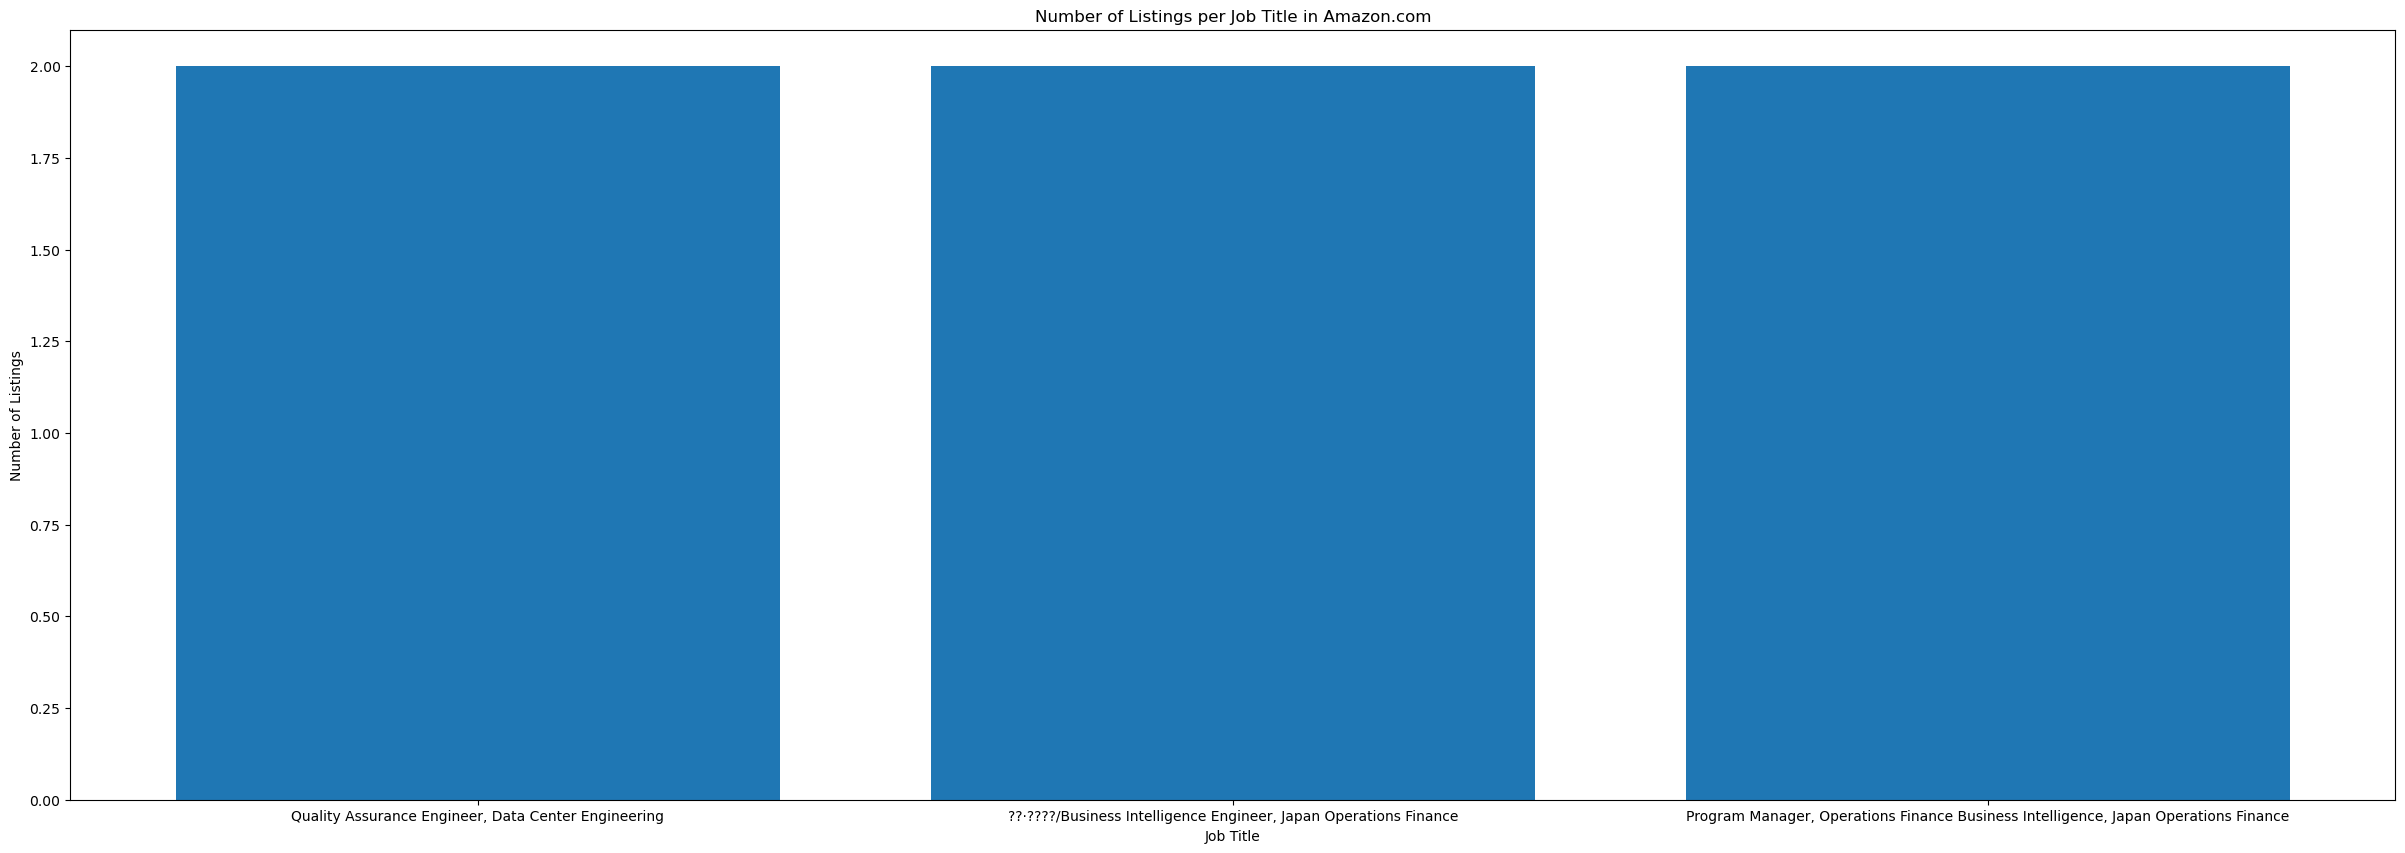

In [179]:
#we now want to categorize the most 3 frequent job titles for each of the 3 most frequent companies 

top_most_frequent_companies = companies[:3]
grouped_data = df.groupby(['Company'])
for x in top_most_frequent_companies:
    company_grouped_data = grouped_data.get_group(x)['Job Title'].value_counts()[:3]
    company_job = company_grouped_data.index
    company_job_count = company_grouped_data.values
    #plotting each bar graph
    plt.figure(figsize=(30, 10))
    plt.bar(company_job,company_job_count)
    plt.xlabel('Job Title')
    plt.ylabel('Number of Listings')
    plt.title('Number of Listings per Job Title in ' + x)

In [180]:
#We will now take a look at some descriptive statistics of the salaries in this data set: 
df.describe()

,Salary_USD
count,3009.000000
mean,90317.996012
std,42646.582032
min,30000.000000
25%,56000.000000
50%,77000.000000
75%,115000.000000
max,315000.000000


In [181]:
#From this, we can conclude that the average salary of our data set is aroudn $90K USD 
#Our minimum salary is around $30k USD and our maximum salary is $315K USD

In [182]:
#Let us explore the entries with the top 10 highest salaries in this data set: 
df.nlargest(10, 'Salary_USD')

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities,Salary_USD,Country
868,Roblox,"Senior/Principal ML Engineer, Content Understa...","san mateo, ca, united states",Full Time,Senior-level,315K+,"Architecture,Computer Vision,Deep Learning,Gen...","Career development,Equity,Flex hours,Flex vaca...",315000.0,United States
1422,Roblox,Senior Data Scientist - Creator Success,"san mateo, ca, united states",Full Time,Senior-level,310K+,"A/B testing,Airflow,Big Data,Causal inference,...","Career development,Equity,Flex hours,Flex vaca...",310000.0,United States
789,Roblox,Senior Data Scientist - Creator Success,"san mateo, ca, united states",Full Time,Senior-level,310K+,"A/B testing,Airflow,Big Data,Causal inference,...","Career development,Equity,Flex hours,Flex vaca...",310000.0,United States
688,Roblox,Senior Data Scientist- Creator Content,"san mateo, ca, united states",Full Time,Senior-level,295K+,"A/B testing,Airflow,Big Data,Causal inference,...","Career development,Equity,Flex hours,Flex vaca...",295000.0,United States
1371,Roblox,Senior Data Scientist- Creator Content,"san mateo, ca, united states",Full Time,Senior-level,295K+,"A/B testing,Airflow,Big Data,Causal inference,...","Career development,Equity,Flex hours,Flex vaca...",295000.0,United States
785,Roblox,Senior Data Scientist - Discovery Experiences,"san mateo, ca, united states",Full Time,Senior-level,295K+,"Airflow,Big Data,Causal inference,Computer Sci...","Career development,Equity,Flex hours,Flex vaca...",295000.0,United States
1412,Roblox,Senior Data Scientist - Discovery Experiences,"san mateo, ca, united states",Full Time,Senior-level,295K+,"Airflow,Big Data,Causal inference,Computer Sci...","Career development,Equity,Flex hours,Flex vaca...",295000.0,United States
732,Roblox,"Principal Software Engineer, Data Engineering","san mateo, ca, united states",Full Time,Senior-level,283K+,"Airflow,Architecture,AWS,Azure,Dagster,Data pi...","Career development,Equity,Flex hours,Flex vaca...",283000.0,United States
1440,Roblox,Principal Deep Learning Engineer - Computer Vi...,"san mateo, ca, united states",Full Time,Senior-level,283K+,"Computer Vision,Deep Learning,Genetics,Machine...","Career development,Equity,Flex hours,Flex vaca...",283000.0,United States
720,Roblox,Principal Machine Learning Engineer - Personal...,"san mateo, ca, united states",Full Time,Senior-level,283K+,"Computer Science,Engineering,Genetics,Machine ...","Career development,Equity,Flex hours,Flex vaca...",283000.0,United States


In [183]:
#We can see here that the company Roblox offers the highest salary compensation. 
#It is also interesting to note that these salaries are in the United States

In [184]:
#Lets explore the job distribution by country 
#First lets see how many jobs there are per country: 
df['Country'].value_counts()



United States     861
Remote            468
India             218
United Kingdom    180
France            142
                 ... 
Chile               1
Niger               1
Jordan              1
Cyprus              1
Latvia              1
Name: Country, Length: 79, dtype: int64

In [185]:
#As we can see, a majority of the jobs lie in the United States

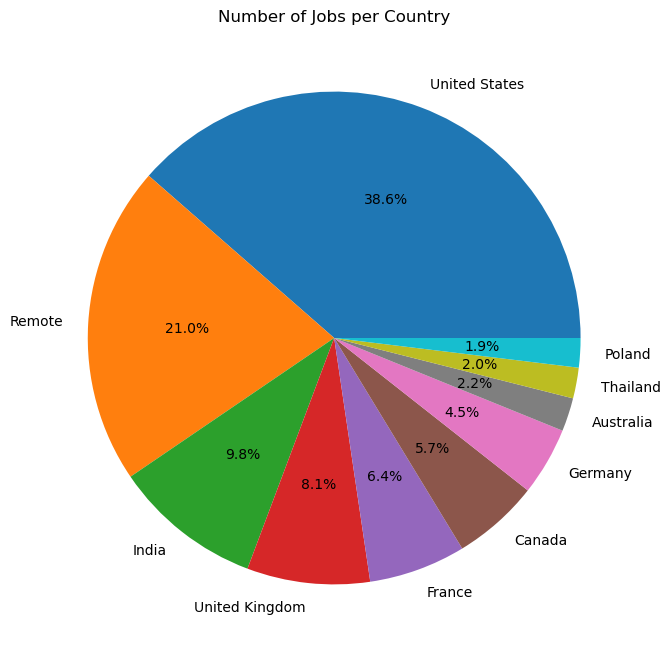

In [186]:
#Lets visualize this data as a pie chart 
#For simiplicity, we will limit our data to the top ten countries that have the most job listings

#Plotting the Pie Chart: 
#extracts the number of jobs by country into a series
jobs_per_country = df['Country'].value_counts()[:10]
#extracts the countries
countries = jobs_per_country.index
#extracts the number of values 
values = jobs_per_country.values

#plotting
plt.figure(figsize = (10,8))
plt.pie(values, labels = countries, autopct='%1.1f%%')
plt.title('Number of Jobs per Country')
plt.show()

In [187]:
#We can see that the Remote work is the second highest source of Jobs for this data set

In [188]:
#Now, lets analyze salaries by experince level: 
print(df['Experience level'].value_counts())
salary_group = df.groupby(['Experience level'])


#Analyzing based on salary for each group:
salary_group.describe()

Senior-level       1825
Mid-level           447
Entry-level         383
Executive-level     122
Name: Experience level, dtype: int64


Salary_USD                                                 \
                      count           mean           std      min      25%   
Experience level                                                             
Entry-level           383.0   49795.665796  21816.940402  30000.0  39000.0   
Executive-level       122.0   98803.278689  39876.594627  57000.0  73000.0   
Mid-level             447.0   66465.033557  22365.372417  30000.0  54500.0   
Senior-level         1825.0  105580.953425  42877.321482  30000.0  69000.0   

                                                
                       50%       75%       max  
Experience level                                
Entry-level        44000.0   52000.0  167000.0  
Executive-level    81000.0  102000.0  230000.0  
Mid-level          65000.0   73000.0  207000.0  
Senior-level      110000.0  129000.0  315000.0

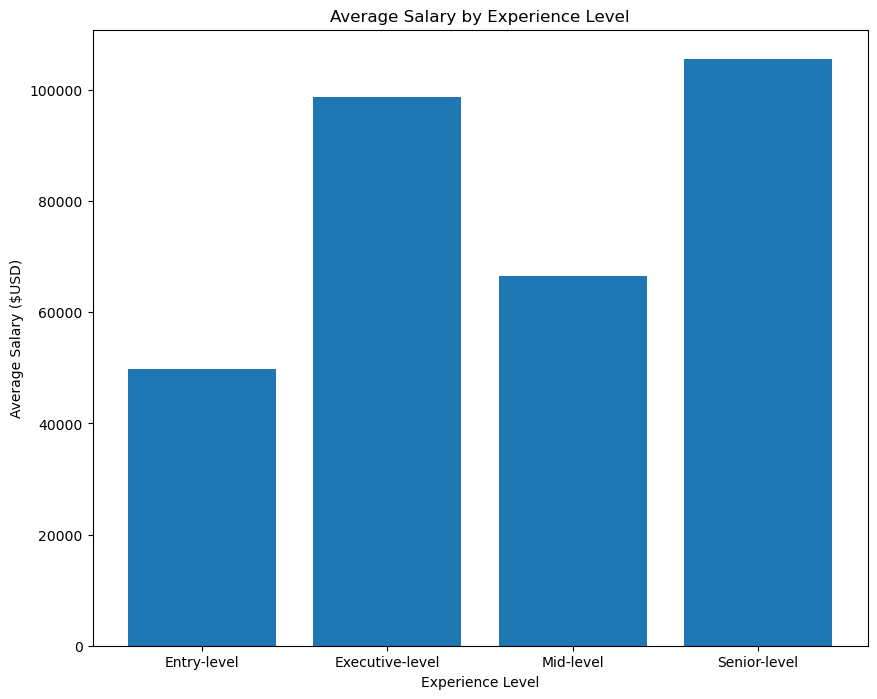

In [189]:
#lets plot the average salaries for each group in a bar chart: 
average_salary = salary_group['Salary_USD'].mean()
plt.figure(figsize=(10, 8))
plt.bar(average_salary.index, average_salary.values)
plt.xlabel('Experience Level')
plt.ylabel('Average Salary ($USD)')
plt.title('Average Salary by Experience Level')
plt.xticks(rotation=0)  
plt.show()

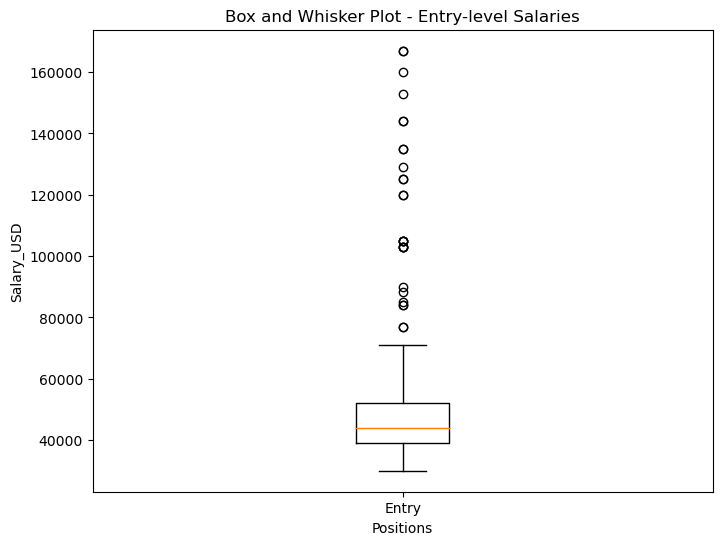

In [190]:
#Lets visualize the groupings for the entry_entry level positions using a box and whisker plot 

entry_level_filt = df['Experience level'] == 'Entry-level'
entry_level = df[entry_level_filt]

plt.figure(figsize=(8, 6))
plt.boxplot(entry_level['Salary_USD'])
plt.title('Box and Whisker Plot - Entry-level Salaries')
plt.xlabel('Positions')
plt.ylabel('Salary_USD')
plt.xticks([1], ['Entry'])
plt.show()
